<a href="https://colab.research.google.com/github/abi672003/Sentiment-Analysis-on-Hospital-Comments/blob/main/Mini_Project_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import spacy
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


True

In [4]:
df = pd.read_csv(r"/content/hospital.csv", encoding='ISO-8859-1')
df

,S.No,Date and Time,Queries,Hospital name,Comment
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...
23069,1557638540,Sun Apr 19 05:15:39 PDT 2009,NO_QUERY,alicewarren,@Theprowler I really wish I could haha
23070,1557638609,Sun Apr 19 05:15:40 PDT 2009,NO_QUERY,suzannahlouise,coursework nooooo
23071,1557638752,Sun Apr 19 05:15:42 PDT 2009,NO_QUERY,chanaya_ashley,@brianangelday26 no Brian!!! ur ma favorite......
23072,1557639005,Sun Apr 19 05:15:47 PDT 2009,NO_QUERY,KLetts,is once again fighting that vomit bug


In [5]:
df["Hospital name	"] = df["Hospital name"].fillna("Date and Time")
df = df.dropna(subset=["Comment"])
nan_counts = df.isna().sum()

print(nan_counts)

S.No               0
Date and Time      0
Queries            0
Hospital name      0
Comment            0
Hospital name\t    0
dtype: int64


In [6]:
# Defining regex patterns.
linebreaks        = "<br /><br />"
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

stop_words = set(stopwords.words('english'))
Lemmatizer = WordNetLemmatizer()

In [7]:
def preprocess_reviews(review):

    review = review.lower()

    review = re.sub(linebreaks," ",review)
    # Replace 3 or more consecutive letters by 2 letter.
    review = re.sub(sequencePattern, seqReplacePattern, review)

    # Replace all emojis.
    review = re.sub(r'<3', '<heart>', review)
    review = re.sub(smileemoji, '<smile>', review)
    review = re.sub(sademoji, '<sadface>', review)
    review = re.sub(neutralemoji, '<neutralface>', review)
    review = re.sub(lolemoji, '<lolface>', review)

    # Remove non-alphanumeric and symbols
    review = re.sub(alphaPattern, ' ', review)

    # Tokenize the input text
    tokens = word_tokenize(review)

    # Remove stop words from the token sequence

    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the remaining tokens
    tokens = [Lemmatizer.lemmatize(token) for token in tokens]

    # Join the cleaned tokens into a single string
    return ' '.join(tokens)

In [8]:
# combine "Hospital name", "Date and Time", and "Comment" columns into a single column called "Text"
df["Text"] = df["Hospital name"] + " " + df["Date and Time"] + " " + df["Comment"]

<ipython-input-8-22b7224ff65a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"] = df["Hospital name"] + " " + df["Date and Time"] + " " + df["Comment"]


In [9]:
df["Text"] = df["Text"].apply(preprocess_reviews)

<ipython-input-9-84527f4e74e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"] = df["Text"].apply(preprocess_reviews)


Keyword and Sentiment Analysis using Word2Vec

In [10]:
!curl https://raw.githubusercontent.com/towardsNLP/IMDB-Semantic-Sentiment-Analysis/main/Word2Vec/src/w2v_utils.py -o w2v_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25779  100 25779    0     0  38213      0 --:--:-- --:--:-- --:--:-- 38191


In [11]:
from w2v_utils import (Tokenizer,
                       evaluate_model,
                       bow_vectorizer,
                       train_logistic_regressor,
                       w2v_trainer,
                       calculate_overall_similarity_score,
                       overall_semantic_sentiment_analysis,
                       list_similarity,
                       calculate_topn_similarity_score,
                       topn_semantic_sentiment_analysis,
                       define_complexity_subjectivity_reviews,
                       explore_high_complexity_reviews,
                       explore_low_subjectivity_reviews,
                       text_SSA)

In [12]:
# Instancing the Tokenizer class
tokenizer = Tokenizer(clean= True,
                      lower= True,
                      de_noise= True,
                      remove_stop_words= True,
                      keep_negation=True)

In [13]:
df['tokenized_text'] = df['Text'].apply(tokenizer.tokenize)

df['tokenized_text_len'] = df['tokenized_text'].apply(len)
df['tokenized_text_len'].apply(np.log).describe()

<ipython-input-13-7c9ce9b03741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df['Text'].apply(tokenizer.tokenize)
<ipython-input-13-7c9ce9b03741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text_len'] = df['tokenized_text'].apply(len)


count    23073.000000
mean         2.797141
std          0.238042
min          2.197225
25%          2.639057
50%          2.772589
75%          2.995732
max          3.688879
Name: tokenized_text_len, dtype: float64

In [14]:
keyed_vectors , keyed_vocab = w2v_trainer(df["tokenized_text"])

In [15]:
print(type(keyed_vectors))
print(type(keyed_vocab))

<class 'gensim.models.keyedvectors.KeyedVectors'>
<class 'dict'>


In [16]:
keyed_vectors.most_similar("research",topn=15)

[('light', 0.9804535508155823),
 ('evening', 0.9796123504638672),
 ('quick', 0.9794726371765137),
 ('catching', 0.9782302975654602),
 ('gotten', 0.9773821234703064),
 ('english', 0.9773476719856262),
 ('longer', 0.9771132469177246),
 ('passed', 0.9771016836166382),
 ('hubby', 0.9768139719963074),
 ('errand', 0.976395845413208),
 ('except', 0.976065456867218),
 ('2nd', 0.9743938446044922),
 ('thankfully', 0.9741941094398499),
 ('mate', 0.9741284251213074),
 ('melt', 0.9737185835838318)]

In [17]:
keyed_vectors.most_similar("hospital",topn=15)

[('normal', 0.9755635857582092),
 ('airport', 0.9735053777694702),
 ('bring', 0.9734522104263306),
 ('doc', 0.9727369546890259),
 ('dentist', 0.9716393351554871),
 ('doctor', 0.9698603749275208),
 ('mate', 0.969641387462616),
 ('grr', 0.9696400761604309),
 ('gym', 0.9688569903373718),
 ('bye', 0.9675824046134949),
 ('shower', 0.9668070673942566),
 ('anytime', 0.9666421413421631),
 ('drink', 0.9664447903633118),
 ('cologne', 0.9663759469985962),
 ('dad', 0.9663516879081726)]

In [18]:
keyed_vectors.most_similar("cost",topn=15)

[('faster', 0.9906895160675049),
 ('per', 0.9904775023460388),
 ('front', 0.9892764687538147),
 ('disease', 0.9880571961402893),
 ('cd', 0.9877805113792419),
 ('wear', 0.9872437715530396),
 ('copy', 0.9869430065155029),
 ('loud', 0.9866658449172974),
 ('sale', 0.9862636923789978),
 ('main', 0.9858149290084839),
 ('rent', 0.985671877861023),
 ('roll', 0.9856263399124146),
 ('area', 0.985619843006134),
 ('ball', 0.9856152534484863),
 ('agency', 0.9853999614715576)]

Clustering Approach to Sentiment Analysis

In [19]:
# To make sure that all `positive_concepts` are in the keyed word2vec vocabulary
positive_concepts = ['excellent', 'awesome', 'cool','decent','amazing', 'strong', 'good', 'great', 'funny', 'entertaining']
pos_concepts = [concept for concept in positive_concepts if concept in keyed_vocab]

In [20]:
# To make sure that all `negative_concepts` are in the keyed word2vec vocabulary
negative_concepts = ['terrible','awful','horrible','boring','bad', 'disappointing', 'weak', 'poor',  'senseless','confusing']
neg_concepts = [concept for concept in negative_concepts if concept in keyed_vocab]

In [21]:
# Calculating Semantic Sentiment Scores by OSSA model
overall_df_scores = overall_semantic_sentiment_analysis (keyed_vectors = keyed_vectors,
                                                   positive_target_tokens = pos_concepts,
                                                   negative_target_tokens = neg_concepts,
                                                   doc_tokens = df['tokenized_text'])

# Calculating Semantic Sentiment Scores by TopSSA model
topn_df_scores = topn_semantic_sentiment_analysis (keyed_vectors = keyed_vectors,
                                                   positive_target_tokens = pos_concepts,
                                                   negative_target_tokens = neg_concepts,
                                                   doc_tokens = df['tokenized_text'],
                                                     topn=30)


# To store semantic sentiment store computed by OSSA model in df
df['overall_PSS'] = overall_df_scores[0]
df['overall_NSS'] = overall_df_scores[1]
df['overall_semantic_sentiment_score'] = overall_df_scores[2]
df['overall_semantic_sentiment_polarity'] = overall_df_scores[3]



# To store semantic sentiment store computed by TopSSA model in df
df['topn_PSS'] = topn_df_scores[0]
df['topn_NSS'] = topn_df_scores[1]
df['topn_semantic_sentiment_score'] = topn_df_scores[2]
df['topn_semantic_sentiment_polarity'] = topn_df_scores[3]

<ipython-input-21-5909380f66d1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_PSS'] = overall_df_scores[0]
<ipython-input-21-5909380f66d1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_NSS'] = overall_df_scores[1]
<ipython-input-21-5909380f66d1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [22]:
words = keyed_vectors.index_to_key
vectors = [keyed_vectors[word] for word in words]

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Create a DataFrame with PCA results and words
pca_df = pd.DataFrame(result, columns=['x', 'y'])
pca_df['word'] = words

In [24]:
import plotly.graph_objs as go

fig = go.Figure(data=go.Scattergl(
    x=pca_df['x'],
    y=pca_df['y'],
    mode='markers',
    marker=dict(
        colorscale='Viridis',
        line_width=1
    ),
    text=pca_df['word'],
    textposition="bottom center"
))

fig.show()

Text(0, 0.5, 'Predicted Positive Labels')

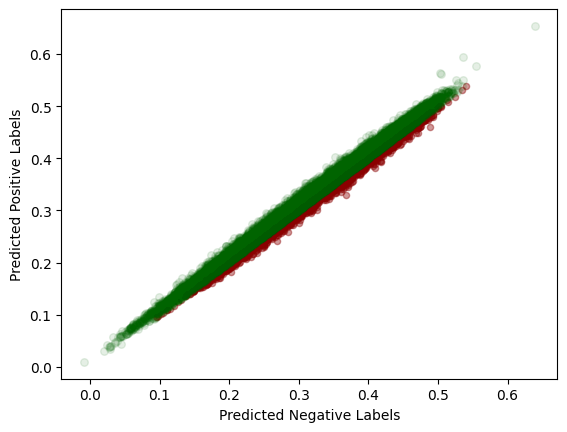

In [25]:
actual_pos_filt = df['topn_semantic_sentiment_polarity'] == 1
actual_neg_filt =  df['topn_semantic_sentiment_polarity'] == 0

# filter positive and negative review based on Most Probable predicted 'y' or 'topn_semantic_sentiment_score' column
predicted_pos_filt = df['topn_semantic_sentiment_polarity'] == 1
predicted_neg_filt = df['topn_semantic_sentiment_polarity'] == 0



# plotting Semantic Sentiment Score Position of Actual Negative Reviews
plt.scatter(df['topn_NSS'][actual_neg_filt],
         df['topn_PSS'][actual_neg_filt],
         label='Actual Negetive Reviews',
           color='DarkRed',
            alpha=0.4 , # set transparency of color
            s=20 # set size of dots
           )

# plotting Semantic Sentiment Score Position of Actual Positive Reviews
plt.scatter(df['topn_NSS'][actual_pos_filt],
         df['topn_PSS'][actual_pos_filt],
         label='Actual Positive Reviews',
       color='DarkGreen',
            alpha=0.1, # set transparency of color
            s=30 # set size of dots
           )
# naming the x & y axis
plt.xlabel('Predicted Negative Labels')
plt.ylabel('Predicted Positive Labels')